In [107]:
import pandas as pd

df = pd.read_csv("Reddit_macron.csv", encoding='utf-8') # ouvrir le fichier csv

#Créer un copie de Travail en choisissant uniquement les colonnes qui nous intéressent
df_nd = df[['id','author','title','Text','subreddit','created','score']].copy()
df_nd = df_nd.drop_duplicates().copy()
df_nd.head()

,id,author,title,Text,subreddit,created,score
0,1jk8ild,Nohan07,Macron propose d'expulser les locataires des H...,NaN,FranceInsoumise,2025-03-26 11:22:51,2
1,1j6cwa4,Nohan07,Ukraine - Russie : Macron fait n'importe quoi !,NaN,FranceInsoumise,2025-03-08 09:34:16,2
2,1iuxpxt,Nohan07,Le pacte secret entre Macron et Le Pen ! – Pan...,NaN,FranceInsoumise,2025-02-21 19:20:55,3
3,1it9v25,Nohan07,Marine Le Pen a soutenu un ami de Macron ￼,NaN,FranceInsoumise,2025-02-19 17:39:24,5
4,1imtylh,Nohan07,"Fichage, surveillance, traçage : le gouvernent...",NaN,FranceInsoumise,2025-02-11 09:22:52,5


In [108]:
import datetime
import time
import os
import calendar

df_nd.loc[:, 'year'] = pd.to_datetime(df_nd.created, format='%Y-%m-%d %H:%M:%S').dt.year
df_nd.loc[:, 'month'] = pd.to_datetime(df_nd.created, format='%Y-%m-%d %H:%M:%S').dt.month
df_nd['month_name'] = df_nd["month"].apply(lambda x: calendar.month_abbr[x])
cols=["month_name","year"]
df_nd['period'] = df_nd[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_nd.head()

,id,author,title,Text,subreddit,created,score,year,month,month_name,period
0,1jk8ild,Nohan07,Macron propose d'expulser les locataires des H...,NaN,FranceInsoumise,2025-03-26 11:22:51,2,2025,3,Mar,Mar-2025
1,1j6cwa4,Nohan07,Ukraine - Russie : Macron fait n'importe quoi !,NaN,FranceInsoumise,2025-03-08 09:34:16,2,2025,3,Mar,Mar-2025
2,1iuxpxt,Nohan07,Le pacte secret entre Macron et Le Pen ! – Pan...,NaN,FranceInsoumise,2025-02-21 19:20:55,3,2025,2,Feb,Feb-2025
3,1it9v25,Nohan07,Marine Le Pen a soutenu un ami de Macron ￼,NaN,FranceInsoumise,2025-02-19 17:39:24,5,2025,2,Feb,Feb-2025
4,1imtylh,Nohan07,"Fichage, surveillance, traçage : le gouvernent...",NaN,FranceInsoumise,2025-02-11 09:22:52,5,2025,2,Feb,Feb-2025


In [109]:
mandat_year=[]
for i in df_nd.index:
    if df_nd['month'][i] >= 5:
        mandat_year.append(df_nd['year'][i]-2017)
    else:
        mandat_year.append(df_nd['year'][i]-2018)

In [110]:
df_nd['mandat'] = mandat_year
df_nd.groupby('mandat').nunique()

,id,author,title,Text,subreddit,created,score,year,month,month_name,period
mandat,,,,,,,,,,,
4,119,15,119,11,3,119,24,2,8,8,8
5,251,24,249,1,5,250,26,2,12,12,12
6,433,32,422,2,6,433,31,2,12,12,12
7,201,34,197,0,6,201,61,2,12,12,12


In [111]:
df_nd.tail()

,id,author,title,Text,subreddit,created,score,year,month,month_name,period,mandat
999,1847pf8,konbini,"Gérard Collomb, ancien maire de Lyon et ancien...",NaN,franceinfo,2023-11-26 11:16:42,0,2023,11,Nov,Nov-2023,6
1000,154qm6b,konbini,"Alors, ça dit quoi ce remaniement d’Emmanuel M...",NaN,franceinfo,2023-07-20 15:14:05,0,2023,7,Jul,Jul-2023,6
1001,123sc94,DrogDrill,Il faut faire tomber le gouvernement Macron!,NaN,franceinfo,2023-03-27 18:31:34,1,2023,3,Mar,Mar-2023,5
1002,yn0om1,infofrance,Emmanuel Macron ne sera pas au départ de la Ro...,NaN,franceinfo,2022-11-05 18:36:54,1,2022,11,Nov,Nov-2022,5
1003,y72b5s,konbini,"Macron félicite Benzema sur Twitter, la France...",NaN,franceinfo,2022-10-18 11:38:11,0,2022,10,Oct,Oct-2022,5


In [172]:
list_period=df_nd["period"].drop_duplicates().tolist()
list_period

list_posts =df_nd['title'].tolist()
# créer une liste regroupant tous les posts par mois 
Collection = [ ]
for p in list_period:
    Collection.append(df_nd['title'][df_nd["period"] == p].tolist())
    
len(Collection)
print(Collection[0][0])

Macron propose d'expulser les locataires des HLM et tente de les faire passer pour des privilégiés.


# Pre-Processing Corpus
Les prétraitement de votre corpus va dépendre en grande partie à la qualité de vos données.
Il faut toutefois garder à l’esprit que certains des prétraitement ne sont pas nécessaires selon le modèle de machine learning que vous utiliserez par la suite ! 

In [114]:
# Load packages
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_english  = set(stopwords.words('english'))
stop_words_french   = set(stopwords.words('french'))
stop_words_specific = ["'", "le","ce","de","cest","celui","ne"]
stop_words          = set(stopwords.words('french') + stopwords.words('english') + stop_words_specific)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lilak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## étape 1 : Basic Cleaning - à adapter à votre corpus/imagination !

- Remove Unicode Strings and Noise
- Remove/Replace URLs, User Mentions and Hashtags
- Non-Letter characters: numbers, emojis, or hash marks.
- Remove/Replace Slang and Abbreviations
- Remove/Replace Contractions
- Remove/Replace Numbers
- Remove/Replace Repetitions of Punctuation
- Remove Punctuation
- Handling Capitalized Words / Lowercase
- Replace Elongated Words (ex: hahahaaaa, ‘Duuuuude, that's awful,’”)

https://pynative.com/python-regex-replace-re-sub/

In [116]:
#the following pre-tokenization receives string as input parameter
#and returns string as output
import re
#import contractions

def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet) # remove Twitter links
    return tweet

def remove_tags(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    tweet = re.sub('RT @[\\w_]+:','', tweet)  # remove retweet label
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

punctuation = '!”$%&\’()*+,-./:;<=>?[\\]^_`{|}~•@``'
def remove_nonText(tweet):
    tweet = re.sub('[' + punctuation + ']+', '', tweet)  # strip punctuation
    tweet = re.sub('\\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub(r'\n','', tweet)  # remove escape sequence
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub('📝 …', '', tweet) # un exemple d'image que vous pouvez compléter !

    return tweet

#def remove_contraction(text):
  #  return ' '.join([contractions.fix(word) for word in text.split()])


In [117]:
Text=Collection[0][0]
print(Text)

Macron propose d'expulser les locataires des HLM et tente de les faire passer pour des privilégiés.


#### Librarie Spacy 
SpaCy est une bibliothèque Python open source pour le traitement du texte et des langues naturelles. Créé par l’équipe de la startup Explosion AI, spaCy a été publiée sous la licence MIT en 2015 et ses principaux développeurs sont Matthew Honnibal et Ines Montani, les fondateurs de la startup.
- Contrairement à NLTK, qui est largement utilisé pour l’enseignement et la recherche, spaCy est conçu pour l’utilisation de production sur de grandes quantités de textes avec une excellente performance et précision
- Il prend en charge des modèles statistiques pour 21 langues dont le français, l’anglais, l’allemand, l’espagnol, l’italien, le portugais et le néerlandais. 
- Vous pouvez écouter le tuto de Clément Plancq ! https://github.com/clement-plancq/tuto-mate

In [119]:
# installer Spacy dans terminal
#conda install -c conda-forge spacy
#!pip install -U spacy

In [120]:
#!python3 -m spacy download fr_core_news_md
#!python -m spacy download fr_core_news_md
#conda install -c conda-forge spacy-model-fr_core_news_md

## étape 2 : Normalising data  - à adapter à votre corpus 
- Spelling Correction
- Replace Negations with Antonyms
- Handling Capitalized Words
- Lowercase
- Tokenization
- Remove Stopwords (ex: the, and….)
- Stemming / racinisation (optional)
- Lemmatizing (optional)

In [122]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
import spacy
from spacy.lang.fr.examples import sentences 
stemmer = SnowballStemmer(language='french')
nlp = spacy.load("fr_core_news_md")

def tokenize(text):
    tknzr = TweetTokenizer(reduce_len=True)
    return tknzr.tokenize(text)

def remove_stopwords(text):
#    return " ".join([token for token in text if token.lower() not in stop_words])
    return [token for token in text if token.lower() not in stop_words_french]

def stemming(text):
    return [stemmer.stem(token) for token in text]

def lemmatizing(text):
    Text = " ".join([token for token in text])
    doc = nlp(Text)
    return [token.lemma_ for token in doc]

In [123]:
print(lemmatizing(remove_stopwords(tokenize(Text))))

['macron', 'proposer', 'de', 'expulser', 'locataire', 'hlm', 'tente', 'faire', 'passer', 'privilégier', '.']


In [124]:
# to add stopwors to your list 
#stop_words_french

In [180]:
def preprocess_post(post):
    """Main master function to clean and normalizing posts, and tokenizing / Lemmatization"""
    tweet = remove_links(post)
    tweet = remove_tags(tweet)
    tweet = remove_users(tweet)
    tweet = remove_nonText(tweet)
 #   tweet = remove_contraction(tweet) # English only
    tweet = tweet.lower()  # lower case
    tweet = tokenize(tweet)  # apply tokenization
    tweet = remove_stopwords(tweet)
#    tweet = stemming(tweet) # Optionnel 
    tweet = lemmatizing(tweet) # Optionnel
    return tweet

In [186]:
# créer une liste regroupant tous les posts
list_posts_clean = [ ]
for post in list_posts:
    list_posts_clean.append(preprocess_post(post))

In [188]:
list_posts_clean

[['macron',
  'proposer',
  'de',
  'expulser',
  'locataire',
  'hlm',
  'tente',
  'faire',
  'passer',
  'privilégier'],
 ['ukrain', 'russie', 'macron', 'faire', 'ne', 'importer', 'quoi'],
 ['pacte', 'secret', 'entrer', 'macron', 'pen', '–', 'panorama', '#'],
 ['marine', 'pen', 'avoir', 'soutenir', 'ami', 'macron', '￼'],
 ['fichage',
  'surveillance',
  'traçage',
  'gouverner',
  'illégitime',
  'macron',
  'continuer',
  'dérive',
  'liberticide'],
 ['contre', 'macron', 'bayrou', 'falloir', 'voter', 'censure'],
 ['macron', 'vouloir', 'ficher', 'le', 'ia', 'qag', 'de', 'ugo', 'bernalicis'],
 ['holland', 'vouloir', 'gouverner', 'macron', '🤮', '￼'],
 ['bayrou', 'macron', 'dehors', '–', 'panorama', '#'],
 ['gouvernement',
  'finir',
  'comme',
  'précédent',
  'censuré',
  'sortir',
  'crise',
  'macron',
  'devoir',
  'partir'],
 ['seul',
  'solution',
  'sortir',
  'crise',
  'politique',
  'actuel',
  'démission',
  'de',
  'emmanuel',
  'macron'],
 ['emmanuel', 'macron', 'devoir',

In [190]:
# lets find the most frequent words
from nltk.probability import FreqDist
from collections import Counter
#Create a list of all words
all_tokens_clean = sum(list_posts_clean, [])
fdist_normalized = FreqDist(all_tokens_clean)

In [192]:
print( "Top 50 in all Macron posts : ---" , fdist_normalized.most_common(50))  

Top 50 in all Macron posts : --- [('macron', 875), ('"', 696), ('avoir', 549), ('emmanuel', 467), ('le', 370), ('de', 264), ('heure', 107), ('«', 96), ('»', 96), ('français', 93), ('france', 92), ('être', 78), ('faire', 73), ('président', 70), ('après', 69), ('plus', 69), ('annoncer', 69), ('macro', 68), ('un', 65), ('réforme', 63), ('retraite', 62), ('cela', 57), ('vouloir', 55), ('contre', 52), ('que', 52), ('devoir', 51), ('zemmour', 48), ('regarder', 47), ('gouvernement', 46), ('entrer', 45), ('an', 45), ('aller', 44), ('politique', 43), ('premier', 42), ('ministre', 42), ('nouveau', 42), ('pen', 39), ('loi', 39), ('se', 38), ('ce', 37), ('visite', 37), ('tout', 36), ('pouvoir', 35), ('dire', 34), ('appeler', 32), ('pari', 30), ('immigration', 30), ('crise', 28), ('guerre', 28), ('il', 28)]


In [212]:
# créer une liste regroupant tous les textes par mois
Collection_clean = [ ]

for i in range(len(Collection)):
    Collection_clean.append(preprocess_post(text) for text in Collection[i])

In [214]:
for text in Collection_clean[0]:
    print(text)

['macron', 'proposer', 'de', 'expulser', 'locataire', 'hlm', 'tente', 'faire', 'passer', 'privilégier']
['ukrain', 'russie', 'macron', 'faire', 'ne', 'importer', 'quoi']
['allocution', 'président', 'républiqu', 'emmanuel', 'macron']
['emmanuel', 'macron', 'atil', 'influence', 'le', 'arrivée', 'soldat', 'russe', 'centrafriqu']
['charles', 'courson', 'macron', 'cauchemarder', 'france', 'résister', 'direct']
['"', 'vouloir', 'faire', 'peur', '"', 'classe', 'politique', 'réagir', 'le', 'allocution', 'de', 'emmanuel', 'macron', 'actualité', 'oranger']
['candace', 'owen', 'linfluenceus', 'trumpist', 'relayer', 'linfox', 'transphob', 'brigitte', 'macron']
['face', '“', 'menace', 'russe', 'macron', 'proposer', 'douvrir', 'débat', 'parapluie', 'nucléaire', 'europé']
['dissuasion', 'nucléaire', 'propos', 'de', 'emmanuel', 'macron', 'braquer', 'autorité', 'russe']
['blanchiment', 'dargent', 'russe', 'perquisition', 'mener', 'chez', 'lassocié', 'tiphaine', 'auzière', 'fille', 'brigitte', 'macro']


In [216]:
# lets find the most frequent words
for i in range(len(Collection_clean)):
    all_tokens_clean_temp = sum(Collection_clean[i], [])
    fdist_normalized_temp = FreqDist(all_tokens_clean_temp)
    print( "mois de", list_period[i] ," : ---" , )
    print(fdist_normalized_temp.most_common(10))               

mois de Mar-2025  : ---
[]
mois de Feb-2025  : ---
[('macron', 16), ('emmanuel', 10), ('"', 6), ('«', 6), ('»', 6), ('avoir', 5), ('pen', 2), ('bayrou', 2), ('troisième', 2), ('mandat', 2)]
mois de Jan-2025  : ---
[('macron', 15), ('emmanuel', 7), ('le', 5), ('"', 4), ('vouloir', 3), ('macro', 3), ('avoir', 3), ('appeler', 3), ('dire', 2), ('premier', 2)]
mois de Dec-2024  : ---
[('macron', 24), ('emmanuel', 19), ('"', 10), ('gouvernement', 7), ('devoir', 6), ('barnier', 6), ('démission', 5), ('de', 5), ('censure', 5), ('avoir', 5)]
mois de Nov-2024  : ---
[('macron', 6), ('aller', 3), ('emmanuel', 3), ('barnier', 2), ('macro', 2), ('"', 2), ('entrer', 2), ('marc', 2), ('bloch', 2), ('panthéon', 2)]
mois de Oct-2024  : ---
[('macron', 16), ('emmanuel', 9), ('de', 6), ('destitution', 5), ('«', 5), ('»', 5), ('procédure', 4), ('le', 4), ('commission', 4), ('initier', 3)]
mois de Aug-2024  : ---
[('macron', 9), ('emmanuel', 6), ('gouvernement', 6), ('politique', 4), ('de', 3), ('nfp', 3),

# Approche contextuelle : les n-gramms
L’approche contextuelle : on s’intéresse non seulement aux mots et à leur fréquence, mais aussi aux mots qui suivent.
Le calcul de n-grams (bigrams pour les co-occurences de mots deux-à-deux, tri-grams pour les co-occurences trois-à-trois, etc.) constitue la méthode la plus simple pour tenir compte du contexte.

### a - Co-occurences
Une cooccurrence est une combinaison de mots qui apparaissent fréquemment ensemble dans un corpus. Ainsi on retrouve dans les même textes les termes : « professeurs, étudiants », « médecin, infirmière », ou encore « pain, boulangerie »...
Les collocations sont eux une forme privilégiée de cooccurrence : ce sont tout simplement des mots qui tendent à apparaître ensemble. Parmi les collocations en langues française, nous pouvons citer : « un désir ardent », « un léger frisson », ou encore « un regret amère ». 

In [220]:
text = nltk.Text(all_tokens_clean)
text.concordance("macron")

Displaying 25 of 875 matches:
                                    macron proposer de expulser locataire hlm 
re passer privilégier ukrain russie macron faire ne importer quoi pacte secret
e importer quoi pacte secret entrer macron pen – panorama # marine pen avoir s
ama # marine pen avoir soutenir ami macron ￼ fichage surveillance traçage gouv
llance traçage gouverner illégitime macron continuer dérive liberticide contre
continuer dérive liberticide contre macron bayrou falloir voter censure macron
macron bayrou falloir voter censure macron vouloir ficher le ia qag de ugo ber
ernalicis holland vouloir gouverner macron 🤮 ￼ bayrou macron dehors – panorama
vouloir gouverner macron 🤮 ￼ bayrou macron dehors – panorama # gouvernement fi
omme précédent censuré sortir crise macron devoir partir seul solution sortir 
itique actuel démission de emmanuel macron emmanuel macron devoir démissionner
mission de emmanuel macron emmanuel macron devoir démissionner coalition psmac
ionner coalition psmac

In [222]:
text.concordance(["macron", "bayrou"])

Displaying 1 of 1 matches:
tinuer dérive liberticide contre macron bayrou falloir voter censure macron vou


In [248]:
# Frequent collocations in the text (usually meaningful phrases)
text.collocations()

emmanuel macron; cela regarder; avoir heure; réforme retraite; avoir
avoir; premier ministre; loi immigration; elisabeth borne; avoir
annoncer; avoir hemmanuel; emmanuel macro; président français; macron
avoir; marine pen; elon musk; michel barnier; hemmanuel macron;
réchauffement climatique; adrien quatennen; volodymyr zelensky


In [250]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Ngrams with the specific name "guerre"
name_filter = lambda *w: 'guerre' not in w

## Bigrams
finder = nltk.BigramCollocationFinder.from_words(text)

# only bigrams that contain 'guerre'
finder.apply_ngram_filter(name_filter)

In [252]:
# return the 10 bi-grams with the highest student ratio
print(finder.nbest(bigram_measures.student_t,10))

[('guerre', 'ukrain'), ('guerre', 'nucléaire'), ('monde', 'guerre'), ('guerre', 'russi'), ('crime', 'guerre'), ('guerre', 'jusque'), ('chef', 'guerre'), ('macro', 'guerre'), ('guerre', 'civil'), ('guerre', 'russieukraine')]


In [254]:
# return the 10 bi-grams with the highest chi2 ratio
print(finder.nbest(bigram_measures.chi_sq,10))

[('guerre', 'ukrain'), ('guerre', 'russi'), ('crime', 'guerre'), ('guerre', 'civil'), ('guerre', 'russieukraine'), ('pilato', 'guerre'), ('éventuellement', 'guerre'), ('guerre', 'jusque'), ('guerre', 'nucléaire'), ('monde', 'guerre')]


In [256]:
# return the 10 bi-grams with the highest likelihood_ratio
print(finder.nbest(bigram_measures.likelihood_ratio,10))

[('guerre', 'ukrain'), ('guerre', 'russi'), ('guerre', 'nucléaire'), ('monde', 'guerre'), ('crime', 'guerre'), ('guerre', 'jusque'), ('guerre', 'civil'), ('guerre', 'russieukraine'), ('pilato', 'guerre'), ('éventuellement', 'guerre')]


In [260]:
#creer une liste pour afficher les résultats en tableau
list_bigrams=[]
list_bigrams.append(finder.nbest(bigram_measures.student_t,10))
list_bigrams.append(finder.nbest(bigram_measures.chi_sq,10))
list_bigrams.append(finder.nbest(bigram_measures.likelihood_ratio,10))

In [264]:
df = pd.DataFrame(list_bigrams)
df=df.transpose()
df.columns = ['Student_t', 'Chi_sq', 'Likelihood_ratio']
df

,Student_t,Chi_sq,Likelihood_ratio
0,"(guerre, ukrain)","(guerre, ukrain)","(guerre, ukrain)"
1,"(guerre, nucléaire)","(guerre, russi)","(guerre, russi)"
2,"(monde, guerre)","(crime, guerre)","(guerre, nucléaire)"
3,"(guerre, russi)","(guerre, civil)","(monde, guerre)"
4,"(crime, guerre)","(guerre, russieukraine)","(crime, guerre)"
5,"(guerre, jusque)","(pilato, guerre)","(guerre, jusque)"
6,"(chef, guerre)","(éventuellement, guerre)","(guerre, civil)"
7,"(macro, guerre)","(guerre, jusque)","(guerre, russieukraine)"
8,"(guerre, civil)","(guerre, nucléaire)","(pilato, guerre)"
9,"(guerre, russieukraine)","(monde, guerre)","(éventuellement, guerre)"


### b- Explore Co-occurring Words (Bigrams)
Une cooccurrence est une combinaison de mots qui apparaissent fréquemment ensemble dans un corpus. Ainsi on retrouve dans les même textes les termes : « professeurs, étudiants », « médecin, infirmière », ou encore « pain, boulangerie »...


In [266]:
from nltk import bigrams
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re
import networkx as nx

In [268]:
# Create list of lists containing bigrams in tweets
terms_bigram = list(bigrams(all_tokens_clean))
# View bigrams 
terms_bigram[0:10]

[('macron', 'proposer'),
 ('proposer', 'de'),
 ('de', 'expulser'),
 ('expulser', 'locataire'),
 ('locataire', 'hlm'),
 ('hlm', 'tente'),
 ('tente', 'faire'),
 ('faire', 'passer'),
 ('passer', 'privilégier'),
 ('privilégier', 'ukrain')]

In [270]:
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(terms_bigram)

bigram_counts.most_common(50)

[(('emmanuel', 'macron'), 418),
 (('avoir', 'avoir'), 135),
 (('macron', 'avoir'), 110),
 (('avoir', 'heure'), 81),
 (('de', 'emmanuel'), 65),
 (('de', 'un'), 59),
 (('cela', 'regarder'), 45),
 (('réforme', 'retraite'), 41),
 (('avoir', 'annoncer'), 38),
 (('"', 'avoir'), 35),
 (('emmanuel', 'macro'), 34),
 (('heure', 'emmanuel'), 32),
 (('macron', 'vouloir'), 30),
 (('que', 'il'), 26),
 (('premier', 'ministre'), 25),
 (('"', 'emmanuel'), 24),
 (('"', '"'), 23),
 (('"', 'le'), 22),
 (('avoir', 'hemmanuel'), 22),
 (('français', 'emmanuel'), 21),
 (('président', 'français'), 21),
 (('hemmanuel', 'macron'), 21),
 (('ce', 'être'), 20),
 (('le', 'elysée'), 20),
 (('macron', '"'), 19),
 (('visite', 'de'), 19),
 (('macron', 'devoir'), 18),
 (('loi', 'immigration'), 17),
 (('président', 'emmanuel'), 17),
 (('macron', 'pen'), 16),
 (('macron', 'annoncer'), 16),
 (('macron', 'se'), 14),
 (('demmanuel', 'macron'), 14),
 (('macron', 'le'), 13),
 (('le', 'europe'), 13),
 (('le', 'assemblée'), 13),


In [272]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'count'])

bigram_df.head()

,bigram,count
0,"(emmanuel, macron)",418
1,"(avoir, avoir)",135
2,"(macron, avoir)",110
3,"(avoir, heure)",81
4,"(de, emmanuel)",65


## c- Visualize Networks of Bigrams


In [274]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [276]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("macron", weight=100)

C:\Users\lilak\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10549 (\N{ARROW POINTING RIGHTWARDS THEN CURVING DOWNWARDS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lilak\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lilak\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127467 (\N{REGIONAL INDICATOR SYMBOL LETTER F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lilak\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


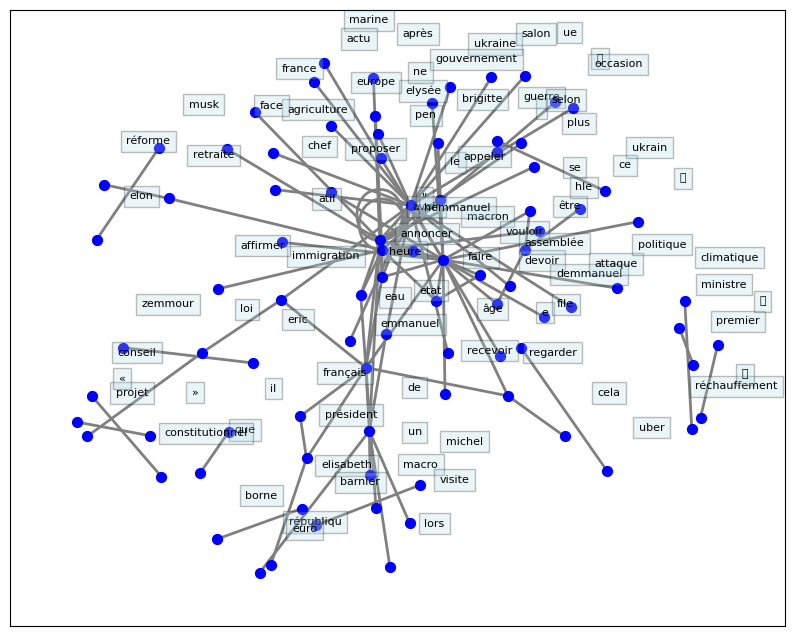

In [278]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=2,
                 edge_color='grey',
                 node_color='blue',
                 node_size=50,
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.145
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='lightblue', alpha=0.25),
            horizontalalignment='center', fontsize=8)
    
plt.show()